This version of the snake game allows you to implement and run your evolutionary algorithm

In [1]:
import random
import time
import turtle

In [2]:
XSIZE = YSIZE = 16 # Number of grid cells in each direction (do not change this)

Change headless to True when evolving your solution. You can then pickle your final solution, and run it with this set to True to visualize the result, if you wish. Note that, when using Turtle,  to run it again properly you might need to go to restart your kernel after the visualization has finished.

If you are running on the cloud, or on Google Colab, you can chose to remove the turtle and display code altogether and only run headless. You could then pickle your best solution and use this code to see it play.

In [3]:
HEADLESS = False

In [4]:
class DisplayGame:
    def __init__(self, XSIZE, YSIZE):
        # SCREEN
        self.win = turtle.Screen()
        self.win.title("EVCO Snake game")
        self.win.bgcolor("grey")
        self.win.setup(width=(XSIZE*20)+40,height=(YSIZE*20)+40)
        #self.win.screensize((XSIZE*20)+20,(YSIZE*20)+20)
        self.win.tracer(0)

        #Snake Head
        self.head = turtle.Turtle()
        self.head.shape("square")
        self.head.color("black")

        # Snake food
        self.food = turtle.Turtle()
        self.food.shape("circle")
        self.food.color("yellow")
        self.food.penup()
        self.food.shapesize(0.55, 0.55)
        self.segments = []

    def reset(self, snake):
        self.segments = []
        self.head.penup()
        self.food.goto(-500, -500)
        self.head.goto(-500, -500)
        for i in range(len(snake)-1):
            self.add_snake_segment()
        self.update_segment_positions(snake)
       
    def update_food(self,new_food):
        self.food.goto(((new_food[1]-9)*20)+20, (((9-new_food[0])*20)-10)-20)
        
    def update_segment_positions(self, snake):
        self.head.goto(((snake[0][1]-9)*20)+20, (((9-snake[0][0])*20)-10)-20)
        for i in range(len(self.segments)):
            self.segments[i].goto(((snake[i+1][1]-9)*20)+20, (((9-snake[i+1][0])*20)-10)-20)

    def add_snake_segment(self):
        self.new_segment = turtle.Turtle()
        self.new_segment.speed(0)
        self.new_segment.shape("square")
        self.new_segment.color("green")
        self.new_segment.penup()
        self.segments.append(self.new_segment)

In [5]:
class snake:
    def __init__(self, _XSIZE, _YSIZE):
        self.XSIZE = _XSIZE
        self.YSIZE = _YSIZE
        self.reset()

    def reset(self):
        self.snake = [[8,10], [8,9], [8,8], [8,7], [8,6], [8,5], [8,4], [8,3], [8,2], [8,1],[8,0] ]# Initial snake co-ordinates [ypos,xpos]    
        self.food = self.place_food()
        self.ahead = []
        self.snake_direction = "right"

    def place_food(self):
        self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        self.food = [8,13]
        while (self.food in self.snake):
            self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        return( self.food )
    
    def update_snake_position(self):
        self.snake.insert(0, [self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1), self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)])

    def food_eaten(self):
        if self.snake[0] == self.food:                                            # When snake eats the food
            return True
        else:    
            last = self.snake.pop()  # [1] If it does not eat the food, it moves forward and so last tail item is removed
            return False
            
    def snake_turns_into_self(self):
        if self.snake[0] in self.snake[1:]:
            return True
        else:
            return False

    def snake_hit_wall(self):
        if self.snake[0][0] == 0 or self.snake[0][0] == (YSIZE-1) or self.snake[0][1] == 0 or self.snake[0][1] == (XSIZE-1):
            return True
        else:
            return False

    # Example sensing functions
    def getAheadLocation(self):
        self.ahead = [ self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1), self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)] 
        
    def sense_wall_ahead(self):
        self.getAheadLocation()
        return (self.ahead[0] == 0 or self.ahead[0] == (YSIZE-1) or self.ahead[1] == 0 or self.ahead[1] == (XSIZE-1) )
    
    def sense_tail_ahead(self):
        self.getAheadLocation()
        return self.ahead in self.snake
        
    def is_wall(self, coordinates):
        return (coordinates[0] == 0 or coordinates[0] == (YSIZE-1) or coordinates[1] == 0 or coordinates[1] == (XSIZE-1) )
        
    def is_body(self, coordinates):
        return coordinates in self.snake
    
    def sense_food_directly_ahead(self):
        if(self.snake_direction == "up"):
            return int((self.snake[0][1] == self.food[1] and self.snake[0][0] > self.food[0]))
        elif(self.snake_direction == "down"):
            return int((self.snake[0][1] == self.food[1] and self.snake[0][0] < self.food[0]))
        elif(self.snake_direction == "right"):
            return int((self.snake[0][0] == self.food[0] and self.snake[0][1] < self.food[1]))
        elif(self.snake_direction == "left"):
            return int((self.snake[0][0] == self.food[0] and self.snake[0][1] > self.food[1]))
    
    def sense_food_directly_left(self):
        if(self.snake_direction == "up"):
            return int((self.snake[0][0] == self.food[0]) and (self.snake[0][1] > self.food[1]))
        elif(self.snake_direction == "right"):
            return int((self.snake[0][0] > self.food[0]) and (self.snake[0][1] == self.food[1]))
        elif(self.snake_direction == "down"):
            return int((self.snake[0][0] == self.food[0]) and (self.snake[0][1] < self.food[1]))
        elif(self.snake_direction == "left"):
            return int((self.snake[0][0] < self.food[0]) and (self.snake[0][1] == self.food[1]))
        
    def sense_food_directly_right(self):
        if(self.snake_direction == "up"):
            return int((self.snake[0][0] == self.food[0]) and (self.snake[0][1] < self.food[1]))
        elif(self.snake_direction == "right"):
            return int((self.snake[0][0] < self.food[0]) and (self.snake[0][1] == self.food[1]))
        elif(self.snake_direction == "down"):
            return int((self.snake[0][0] == self.food[0]) and (self.snake[0][1] > self.food[1]))
        elif(self.snake_direction == "left"):
            return int((self.snake[0][0] > self.food[0]) and (self.snake[0][1] == self.food[1]))
    
    def sense_ahead_is_free(self):
        return int(not (self.sense_wall_ahead() or self.sense_tail_ahead()))
    
    def sense_left_is_free(self):
        if(self.snake_direction == "up"):
            coordinatesToLeft = [self.snake[0][0], self.snake[0][1] - 1]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        elif(self.snake_direction == "down"):
            coordinatesToLeft = [self.snake[0][0], self.snake[0][1] + 1]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        elif(self.snake_direction == "left"):
            coordinatesToLeft = [self.snake[0][0] + 1, self.snake[0][1]]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        elif(self.snake_direction == "right"):
            coordinatesToLeft = [self.snake[0][0] - 1, self.snake[0][1]]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        
    def sense_right_is_free(self):
        if(self.snake_direction == "up"):
            coordinatesToLeft = [self.snake[0][0], self.snake[0][1] + 1]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        elif(self.snake_direction == "down"):
            coordinatesToLeft = [self.snake[0][0], self.snake[0][1] - 1]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        elif(self.snake_direction == "left"):
            coordinatesToLeft = [self.snake[0][0] - 1, self.snake[0][1]]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        elif(self.snake_direction == "right"):
            coordinatesToLeft = [self.snake[0][0] + 1, self.snake[0][1]]
            return int(not (self.is_body(coordinatesToLeft) or self.is_wall(coordinatesToLeft)))
        
# Inform snake the direction it needs to travel to get food (angle in radians)
    def direction_to_food(self):
        return np.array(self.food) - np.array(self.snake[0])
    
    def get_snake_direction(self):
        if(self.snake_direction == "up"):
            # Get the coordinate 0 degrees of self.snake[0]
            return np.array([-1, 0])
        elif(self.snake_direction == "right"):
            # Get the coordinate 90 degrees of self.snake[0]
            return np.array([0, 1])
        elif(self.snake_direction == "down"):
            return np.array([1, 0])
        elif(self.snake_direction == "left"):
            # Get the coordinate 270 degrees of self.snake[0]
            return np.array([0, -1])
    
    def normalize(self, snake_vector):
        return snake_vector / np.linalg.norm(snake_vector)
    
    def get_angle_to_food(self):
        snake_direction = self.get_snake_direction()
        food_direction = self.direction_to_food()
        snake_direction_vector = self.normalize(snake_direction)
        food_direction_vector = self.normalize(food_direction)
        dot_product = np.dot(snake_direction_vector, food_direction_vector)
        
        if dot_product > 1:
            dot_product = 1
        elif dot_product < -1:
            dot_product = -1
            
        angle = np.arccos(dot_product)
        if angle > np.pi:
            angle = angle - (2 * np.pi)
        return angle

In [6]:
snake_game = snake(XSIZE,YSIZE)

In [7]:
if not HEADLESS:
    display = DisplayGame(XSIZE,YSIZE)

In [8]:
def run_game(AIBrain, display,snake_game, headless):

    score = 0
    timeSinceLastEaten = 0
    snake_game.reset()
    if not headless:
        display.reset(snake_game.snake)
        display.win.update()
    snake_game.place_food()
    game_over = False
    snake_direction = "right"

    flag = True
    while not game_over:

        # ****YOUR AI BELOW HERE******************
        # Pass in values which will be used as the input nodes in the neural network
        output = AIBrain.feedForward([snake_game.get_angle_to_food(), snake_game.sense_ahead_is_free(), 
                                      snake_game.sense_left_is_free(), snake_game.sense_right_is_free(), 
                                      snake_game.sense_food_directly_ahead(), snake_game.sense_food_directly_left(),
                                      snake_game.sense_food_directly_right()])
        previous_snake_direction = snake_game.snake_direction
        
        # Choose decision with the largest value
        decision = np.argmax(output, axis=0)
        
        # Map decision made to a direction of which the snake will travel
        if decision == 0:
            if previous_snake_direction == "up":
                snake_game.snake_direction = "left"
            elif previous_snake_direction == "right":
                snake_game.snake_direction = "up"
            elif previous_snake_direction == "left":
                snake_game.snake_direction = "down"
            elif previous_snake_direction == "down":
                snake_game.snake_direction = "right"
        if decision == 1:
            if previous_snake_direction == "up":
                snake_game.snake_direction = "right"
            elif previous_snake_direction == "right":
                snake_game.snake_direction = "down"
            elif previous_snake_direction == "left":
                snake_game.snake_direction = "up"
            elif previous_snake_direction == "down":
                snake_game.snake_direction = "left"
        if decision == 2:
            if previous_snake_direction == "up":
                snake_game.snake_direction = "up"
            elif previous_snake_direction == "right":
                snake_game.snake_direction = "right"
            elif previous_snake_direction == "left":
                snake_game.snake_direction = "left"
            elif previous_snake_direction == "down":
                snake_game.snake_direction = "down"
        
        
        # ****YOUR AI ABOVE HERE******************
            
        snake_game.update_snake_position()

        # Check if food is eaten
        if snake_game.food_eaten():
            snake_game.place_food()
            score += 1
            timeSinceLastEaten = 0
            if not headless: display.add_snake_segment()
        else:
            timeSinceLastEaten += 1
            

        # Game over if the snake runs over itself
        if snake_game.snake_turns_into_self():
            game_over = True
            print("Snake turned into itself!")

        # Game over if the snake goes through a wall
        if snake_game.snake_hit_wall():
            game_over = True
            print("Snake hit a wall!")
        
        # Game over if the snake does not eat within specified time
        if timeSinceLastEaten > 100:
            game_over = True
            print("Snake starved to death")

        if not headless:       
            display.update_food(snake_game.food)
            display.update_segment_positions(snake_game.snake)
            display.win.update()
            time.sleep(0.2) # Change this to modify the speed the game runs at when displayed.

    print("\nFINAL score - " + str(score))
    if not headless: turtle.done()
    return score


# Defining my neural network

In [9]:
import numpy as np
import math

class MLP(object):
    def __init__(self, numInput, numHidden1, numHidden2, numOutput):
        self.fitness = 0
        self.numInput = numInput + 1 # Add bias node from input to hidden layer 1 only
        self.numHidden1 = numHidden1
        self.numHidden2 = numHidden2
        self.numOutput = numOutput
        
        self.w_i_h1 = np.random.randn(self.numHidden1, self.numInput)
        self.w_h1_h2 = np.random.randn(self.numHidden2, self.numHidden1 + 1) # Add bias from hidden layer 1 to hidden layer 2
        self.w_h2_o = np.random.randn(self.numOutput, self.numHidden2 + 1)   # Add bias from hidden layer 2 to output layer

        self.ReLU = lambda x : max(0,x)
        
    def sigmoid(self, x):
        try:
            ans = (1 / (1 + math.exp(-x)))
        except OverflowError:
            ans = float('inf')
        return ans

In [10]:
class MLP(MLP):
    def feedForward(self, inputs):
        inputsBias = inputs[:]
        inputsBias.insert(len(inputs), 1) # Add bias to input layer
        
        h1 = np.dot(self.w_i_h1, inputsBias)
        h1 = [self.ReLU(x) for x in h1]
        h1.append(1)                                 # Add bias to hidden layer 1  
        
        h2 = np.dot(self.w_h1_h2, h1)
        h2 = [self.ReLU(x) for x in h2]
        h2.append(1)                                 # Add bias to hidden layer 2  
        
        output = np.dot(self.w_h2_o, h2)
        output = [self.sigmoid(x) for x in output]
        return output

In [11]:
class MLP(MLP):
    
    def getWeightsLinear(self):
        flat_w_i_h1 = list(self.w_i_h1.flatten())
        flat_w_h1_h2 = list(self.w_h1_h2.flatten())
        flat_w_h2_o = list(self.w_h2_o.flatten())
        return( flat_w_i_h1 + flat_w_h1_h2 + flat_w_h2_o )

    def setWeightsLinear(self, Wgenome):
        numWeights_I_H1 = self.numHidden1 * self.numInput
        numWeights_H1_H2 = self.numHidden2 * (self.numHidden1 + 1) # Take into account bias
        numWeights_H2_O = self.numOutput * self.numHidden2
        
        self.w_i_h1 = np.array(Wgenome[:numWeights_I_H1])
        self.w_i_h1 = self.w_i_h1.reshape((self.numHidden1, self.numInput))
        
        self.w_h1_h2 = np.array(Wgenome[numWeights_I_H1:(numWeights_H1_H2+numWeights_I_H1)])
        self.w_h1_h2 = self.w_h1_h2.reshape((self.numHidden2, self.numHidden1 + 1)) # Take into account bias

        self.w_h2_o = np.array(Wgenome[(numWeights_H1_H2+numWeights_I_H1):])
        self.w_h2_o = self.w_h2_o.reshape((self.numOutput, self.numHidden2 + 1)) # Take into account bias

# The Genetic Algorithm

In [12]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import random
import time

In [13]:
numInputNodes = 7
numHiddenNodes1 = 4
numHiddenNodes2 = 4
numOutputNodes = 3 # One for left, one for right, one for straight ahead

IND_SIZE = ((numInputNodes + 1) * numHiddenNodes1) + ((numHiddenNodes1 + 1) * numHiddenNodes2) + ((numHiddenNodes2 + 1) * numOutputNodes)

In [14]:
myNeuralNetwork = MLP(numInputNodes, numHiddenNodes1, numHiddenNodes2, numOutputNodes)

In [15]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)

In [16]:
def evaluate(indiv):
    myNeuralNetwork.setWeightsLinear(indiv)
    snake_game.reset()
    score = run_game(myNeuralNetwork, display, snake_game, headless=True)
    return score,

In [17]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.5, indpb=0.2)
toolbox.register("mate", tools.cxOnePoint)

In [18]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [19]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

# Main algorithm

In [20]:
NGEN = 100
CXPB = 0.5
MUTPB = 0.3

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats,
                               halloffame=hof, verbose=True)

Snake turned into itself!

FINAL score - 0
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hi

Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 2
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 2
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
5  	64    	[1.44]	[2.07518674]	[0.]	[14.]
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 2
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Sna

Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 4
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 6
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 11
Snake

Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 2
Snake turned into itself!

FINAL score - 1
13 	71    	[2.59]	[3.39439243]	[0.]	[14.]
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 5
Snake turned into itself!

FINAL score - 11
Snake turned into itse

Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 8
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 3
Snake starved to death

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 5
Snake hit a wall!

FINAL score - 3
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 2
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 1
Snake hit a wall!



Snake turned into itself!

FINAL score - 20
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 2
Snake hit a wall!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
20 	57    	[5.08]	[5.80289583]	[0.]	[20.]
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
S

Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 0
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 6
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 2
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 3
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake starved to death

FINAL score - 0
Snake turned into itself!

FINAL score - 6
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 20
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 2
Snake turned into itself!

FINAL score - 6
Sn

Snake turned into itself!

FINAL score - 10
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 15
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 10
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 9
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 7
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 2
Snake hit a wall!

FINAL score - 0
Snake starved to death

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake starved to death

FINAL score - 0
Snake turned into itself!

FINAL score - 12
Snake hit a wall!

FINAL score - 4
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into 

Snake turned into itself!

FINAL score - 21
Snake hit a wall!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 6
Snake hit a wall!

FINAL score - 10
Snake turned into itself!

FINAL score - 12
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 3
Snake starved to death

FINAL score - 0
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 13
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 2
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 12
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FIN

Snake hit a wall!

FINAL score - 13
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 4
Snake turned into itself!

FINAL score - 10
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 3
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 4
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 4
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 2
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 5
Snak

Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 10
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 14
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 5
Snake hit a wall!

FINAL score - 12
Snake turned into itself!

FINAL score - 7
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 2
Snake starved to death

FINAL score - 2
Sn

Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 25
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 16
Snake turned into itself!

FINAL score - 9
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 4
Snake turned into itself!

FINAL score - 2
40 	58    	[11.83]	[8.66031755]	[0.]	[27.]
Snake starved to death

FINAL score - 0
Snake hit a wall!

FINAL score - 13
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 12
Snake starved to de

Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 18
Snake hit a wall!

FINAL score - 0
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 24
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 13
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 12
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 6
Snake turned into itself!

FINAL score - 16
Snake turned into itself!

FINAL score - 23
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 8
Snake turned into itsel

Snake hit a wall!

FINAL score - 17
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 14
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 17
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 22
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 4
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FIN

Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 18
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 16
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 10
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 15
Snake hit a wall!

FINAL score - 3
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 22
50 	62    	[14.15]	[8.60392352]	[0.]	[26.]
Snake hit a wall!

FINAL score - 3
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL sco

Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 18
Snake hit a wall!

FINAL score - 6
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 18
53 	60    	[14.22]	[8.23963591]	[0.]	[26.]
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 16
Snake starved to death

FINAL score - 2
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 4
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 20
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Sna

Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 8
Snake hit a wall!

FINAL score - 7
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 28
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 16
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 22
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 4
Snake turned into itself!

FINAL score - 5
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 21
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 4
Snake starved to death

FINAL score - 2
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 16
Snake turned into itself!

FINAL scor

Snake turned into itself!

FINAL score - 26
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 19
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 16
Snake turned into itself!

FINAL score - 5
Snake starved to death

FINAL score - 2
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 24
Snake turned into itself!

FINAL score - 22
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 10
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 12
Snake turned into itself!

FINAL sc

Snake turned into itself!

FINAL score - 24
Snake turned into itself!

FINAL score - 11
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 9
Snake turned into itself!

FINAL score - 9
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 22
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 2
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 11
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 20
Sn

Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 11
Snake hit a wall!

FINAL score - 7
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 4
Snake turned into itself!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 12
Snake turned into itself!

FINAL score - 18
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 9
Snake turned into itself!

FINAL score - 5
Snake starved to death

FINAL scor

Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 18
Snake hit a wall!

FINAL score - 2
68 	72    	[12.51]	[8.44451893]	[0.]	[29.]
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 10
Snake hit a wall!

FINAL score - 13
Snake turned into itself!

FINAL score - 18
Snake starved to death

FINAL score - 2
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 3
Snake turned into itself!

FINAL score - 15
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 11
Snake turned into itself!

FINAL score - 4
Snake starved to death

FINAL score - 1
Snake starved to death

FINAL score - 2
Snake turned into itself!

FINAL score - 4
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 2
Snake turned int

Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 14
Snake hit a wall!

FINAL score - 5
Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 17
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 9
Snake turned into itself!

FINAL score - 7
Snake hit a wall!

FINAL score - 9
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 6
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 2
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itsel

Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 7
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 11
Snake turned into itself!

FINAL score - 7
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 21
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 15
Snake hit a wall!

FINAL score - 3
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 9
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 7
Sn

Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 21
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 24
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 12
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 22
Snake turned into itself!

FINAL score - 7
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 7
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL sco

Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 13
Snake starved to death

FINAL score - 2
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 12
Snake turned into itself!

FINAL score - 11
Snake turned into itself!

FINAL score - 12
Snake starved to death

FINAL score - 2
Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 12
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake turned into itself!


Snake hit a wall!

FINAL score - 11
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 7
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 11
Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 16
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 4
Snake turned into itself!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 24
Snake turne

Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 22
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 1
Snake starved to death

FINAL score - 3
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake hit a wall!

FINAL score - 14
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 20
Snake turned into itself!

FINAL score - 2
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 10
Snake turned into itself!

FINAL score - 12
Snake turned into itself!

FINAL score - 16
Snake hit a wall!

FINAL 

Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 8
Snake turned into itself!

FINAL score - 14
Snake turned into itself!

FINAL score - 18
Snake hit a wall!

FINAL score - 17
Snake turned into itself!

FINAL score - 20
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 17
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 8
Snake hit a wall!

FINAL score - 2
Snake starved to death

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 15
Snake turned into itself!

FINAL score - 20
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 24
S

Snake hit a wall!

FINAL score - 17
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 5
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 17
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 0
Snake turned into itself!

FINAL score - 19
Snake hit a wall!

FINAL score - 0
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 6
93 	51    	[15.2] 	[8.79772698]	[0.]	[28.]
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 16
Snake hit a wall!

FINAL 

Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 16
Snake turned into itself!

FINAL score - 24
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 17
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 11
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 15
96 	63    	[14.82]	[8.18092904]	[0.]	[25.]
Snake turned into itself!

FINAL score - 3
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 22
Snake turned into itself!

FINAL score - 0
Snake starved to death

FINAL score - 0
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 4
Snake turned into itself!

FINAL score - 5
Snake turned into itself!

FINAL score - 6
Snake turned into itself!

FINAL score - 1
Snake turned into itself!

FINAL score - 3
Snake hit a wall!

FINAL score - 2
Snake turne

Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 23
Snake hit a wall!

FINAL score - 0
Snake turned into itself!

FINAL score - 10
99 	70    	[12.02]	[9.29513851]	[0.]	[26.]
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 4
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 8
Snake hit a wall!

FINAL score - 1
Snake starved to death

FINAL score - 1
Snake turned into itself!

FINAL score - 21
Snake hit a wall!

FINAL score - 1
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 21
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 22
Snake turned into itself!

FINAL score - 18
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 13
Snake turned into itself!

FINAL score - 19
Snake turned into itself!

FINAL score - 23
Snake turned into itself!

FINAL score - 3
Sn

# Plot statistics

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

gen = log.select("gen")
_min = log.select("min")
_max = log.select("max")
avgs = log.select("avg")
stds = log.select("std")

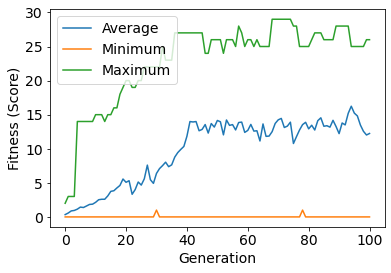

In [22]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

fig1, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs, label="Average")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness (Score)")

line2 = ax1.plot(gen, _min, label="Minimum")
line3 = ax1.plot(gen, _max, label="Maximum")
ax1.legend()

# Get the best individual and watch them play

In [23]:
import pickle

def saveBestSnake(bestSnake):
    outputfile = open("bestSnake", "wb+")
    pickle.dump(bestSnake, outputfile)
    outputfile.close()
    
def getBestSnake():
    file = open("bestSnake", "rb")
    bestSnake = pickle.load(file)
    file.close()
    return bestSnake

In [24]:
bestSnake = tools.selBest(pop, 1)[0]
saveBestSnake(bestSnake)

### Restart Kernel here if needed (need to compile classes above)

In [25]:
display = DisplayGame(XSIZE,YSIZE)

In [26]:
bestSnake = getBestSnake()

snake_game = snake(XSIZE,YSIZE)
snake_game.reset()

myNeuralNetwork = MLP(numInputNodes, numHiddenNodes1, numHiddenNodes2, numOutputNodes)
myNeuralNetwork.setWeightsLinear(bestSnake)


score = run_game(myNeuralNetwork, display, snake_game, headless=False)

Snake turned into itself!

FINAL score - 19
